$\color{yellow}{\text{Importy niezbędnych bibliotek}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.integrate as spi

$\color{yellow}{\text{Zadanie 1}}$

Wczytanie danych

In [2]:
ms = np.arange(0, 7, 1)
real_1990 = 248709873

years = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
population = np.array([76212168, 92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203302031, 226542199])

points = np.array(list(zip(years, population)))

```a) Dla każdego m dokonaj ekstrapolacji wielomianu do roku 1990. Porównaj otrzymaną wartość z prawdziwą wartoscią dla roku 1990 wynoszącą 248 709 873. Ile wynosi błąd względny ekstrapolacji dla roku 1990? Dla jakiego m błąd względny był najmniejszy?```

In [3]:
def extrapolate(m, points, target_year):
    years = points[:,0]
    population = points[:,1]
    n = len(years)
    A = np.zeros((n, m+1))
    for i in range(n):
        for j in range(m+1):
            A[i][j] = years[i]**j
    c = np.linalg.solve(A.T @ A, A.T @ population)
    extrapolated_points = np.array([target_year**i for i in range(m+1)])
    return c @ extrapolated_points

In [4]:
def extrapolate_lib(m, points, target_year):
    years = points[:, 0]
    population = points[:, 1]
    coefficients = np.polyfit(years, population, m)
    extrapolated_value = np.polyval(coefficients, target_year)
    return extrapolated_value

In [5]:
def perform_experiment(func, m, points):
    best_m, lowest_error = None, float('inf')
    for m in ms:
        extrapolated_value = func(m, points, 1990)
        error = abs(real_1990 - extrapolated_value) / real_1990 * 100

        if error < lowest_error:
            best_m, lowest_error = m, error
    return best_m, lowest_error
        
best_m, lowest_error = perform_experiment(extrapolate, ms, points)
best_m_lib, lowest_error_lib = perform_experiment(extrapolate_lib, ms, points)
print(f'Najlepszy wynik uzyskano dla wielomianu stopnia: {best_m}, wyniosl on: {lowest_error:.2f}% \ BEZ FUNKCJI BIBLIOTECZNYCH')
print(f'Najlepszy wynik uzyskano dla wielomianu stopnia: {best_m_lib}, wyniosl on: {lowest_error_lib:.2f}% \ FUNKCJE BIBLIOTECZNE')

Najlepszy wynik uzyskano dla wielomianu stopnia: 2, wyniosl on: 2.41% \ BEZ FUNKCJI BIBLIOTECZNYCH
Najlepszy wynik uzyskano dla wielomianu stopnia: 4, wyniosl on: 2.25% \ FUNKCJE BIBLIOTECZNE


```b) Zbyt niski stopien wielomianu oznacza, że model nie jest w stanie uwzględnić zmienności danych (duże obciążenie). Zbyt wysoki stopień wielomianu oznacza z kolei, że model uwzględnia szum lub błędy danych (duża wariancja), co w szczególności obserwowaliśmy w przypadku interpolacji. Wielomian stopnia m posiada k = m + 1 parameterów. Stopień wielomianu, m, jest hiperparametrem modelu. Do wyboru optymalnego stopnia wielomianu można posłużyc sie kryterium informacyjnym Akaikego.```

In [6]:
def aic_c(m, points):
    years = points[:,0]
    population = points[:,1]
    n = len(years)
    k = m + 1
    aic = n * np.log(np.sum((extrapolate(m, points, years) - population)**2) / n) + 2 * k
    aic_c = aic + 2 * k * (k + 1) / (n - k - 1)

    return aic_c

In [7]:
best_m, lowest_aic_c = None, float('inf')
for m in ms:
    aic_c_value = aic_c(m, points)
    if aic_c_value < lowest_aic_c:
        best_m, lowest_aic_c = m, aic_c_value

print(f'Najnizsza wartosc wspolczynnika AICc uzyskano dla wielomianu stopnia: {best_m}')

Najnizsza wartosc wspolczynnika AICc uzyskano dla wielomianu stopnia: 2


$\color{yellow}{\text{Zadanie 2}}$

```Wykonaj aproksymację średniokwadratową ciagłą funkcji $f(x) = \sqrt(x)$ w przedziale [0,2] wielomianem drugiego stopnia, używajac wielomianów Czebyszewa. Aproksymacja ta jest tańszym obliczeniowo zamiennikiem aproksymacji jednostajnej.```

In [8]:
def T_k(k, x): # Zakladamy uzycie wielomianu 2 stopnia
    if k == 0:
        return 1
    if k == 1:
        return x
    if k == 2:
        return 2 * x**2 - 1
    else: # Nie powinno sie zdarzyc
        return None 

def weight(x):
    return 1 / np.sqrt(1 - x**2)

def f(x):
    return np.sqrt(x + 1)

def calculate_coefficients():
    c_k_values = []
    for k in range(3):
        # Iloczyn skalarny <f, Tk>, licznik
        nominator = spi.quad(lambda x: weight(x) * f(x) * T_k(k, x), -1, 1)[0]
        # Iloczyn skalarny <Tk, Tk>, mianownik
        denominator = spi.quad(lambda x: weight(x) * T_k(k, x) * T_k(k, x), -1, 1)[0]
        # Wspolczynnik c_k
        c_k = nominator / denominator
        c_k_values.append(c_k)

    return c_k_values

def calculate_value(x):
    c0, c1, c2 = calculate_coefficients()
    return c0 * T_k(0, x) + c1 * T_k(1, x) + c2 * T_k(2, x)

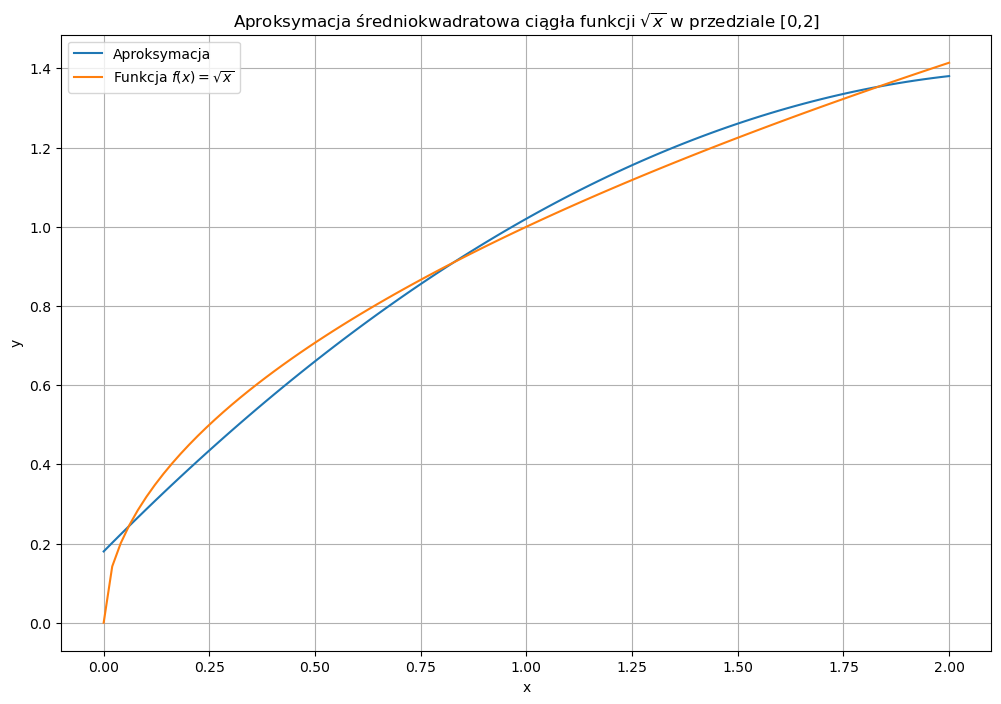

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(np.linspace(0, 2, 100), [calculate_value(x) for x in np.linspace(-1, 1, 100)], label='Aproksymacja')
plt.plot(np.linspace(0, 2, 100), [f(x) for x in np.linspace(-1, 1, 100)], label='Funkcja $f(x) = \sqrt{x}$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproksymacja średniokwadratowa ciągła funkcji $\sqrt{x}$ w przedziale [0,2]')
plt.grid()
plt.show()